In [0]:
# Loading the libraries
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np

In [0]:
tf.__version__

'2.2.0-rc2'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pwd

/content


In [0]:
root_path = 'gdrive/My Drive/Work/Research/Ideation/rare-event-prediction/rare-event-codebase/setup'

import os
os.chdir(root_path)

In [0]:
!pwd

/content/gdrive/My Drive/Work/Research/Ideation/rare-event-prediction/rare-event-codebase/setup


# Fit a simple deep learning model

In [0]:
df = pd.read_csv('data/sampledata.csv')

In [0]:
df.head(5)

,y,x,x1,x2
0,-9.784048,-8.463052,12.654344,-13.851703
1,14.669124,5.006981,24.721533,27.959961
2,-5.974108,-7.279825,-24.617841,-13.336648
3,12.981076,12.752716,-20.995864,4.929438
4,0.960446,-1.586964,-17.425014,4.199543


In [0]:
X = df.loc[:, df.columns != 'y'].values
y = df['y'].values

In [0]:
# Dense layer model

model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(X.shape[1], )))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='mse',
              metrics='mse')

In [0]:
history = model.fit(x=X,
                    y=y,
                    batch_size=16,
                    epochs=500,
                    validation_split=0.2).history

Epoch 1/500
5/5 [==============================] - 0s 7ms/step - loss: 33.9786 - mse: 33.9786 - val_loss: 40.0159 - val_mse: 28.0952
Epoch 2/500
5/5 [==============================] - 0s 8ms/step - loss: 33.8526 - mse: 33.8526 - val_loss: 39.8474 - val_mse: 27.9264
Epoch 3/500
5/5 [==============================] - 0s 8ms/step - loss: 33.7393 - mse: 33.7393 - val_loss: 39.6982 - val_mse: 27.8048
Epoch 4/500
5/5 [==============================] - 0s 8ms/step - loss: 33.6472 - mse: 33.6472 - val_loss: 39.5329 - val_mse: 27.6389
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 33.5609 - mse: 33.5609 - val_loss: 39.3608 - val_mse: 27.4666
Epoch 6/500
5/5 [==============================] - 0s 8ms/step - loss: 33.4381 - mse: 33.4381 - val_loss: 39.2048 - val_mse: 27.3297
Epoch 7/500
5/5 [==============================] - 0s 7ms/step - loss: 33.3315 - mse: 33.3315 - val_loss: 39.0453 - val_mse: 27.1937
Epoch 8/500
5/5 [==============================] - 0s 7ms/step - loss

# Visualize results

In [0]:
import utilities.simpleplots as sp

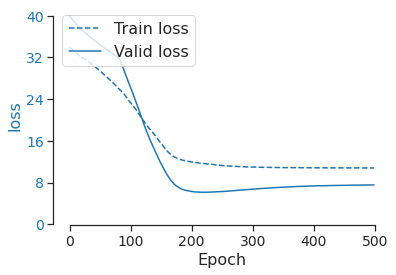

In [0]:
plt, fig = sp.plot_metric(model_history=history, metric='loss')